In [12]:
# Ioana Mititean
# ASTR 480
# Navigating the Night Sky

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

import warnings
warnings.filterwarnings('ignore', category=Warning)

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import (AirmassConstraint, MoonSeparationConstraint, SunSeparationConstraint, AtNightConstraint, 
                       MoonIlluminationConstraint)

In [13]:
# Modifying the original quasar table to get rid of unneeded rows and columns
column_names = ["Name", "RA", "DEC", "Bmag", "Rmag"]
quasar_table = pd.read_csv('./QuasarListOfTen.csv', header = None, names = column_names)

table_chopped = quasar_table.drop(index = 0, columns = ["Bmag", "Rmag"])
quasar_vals = table_chopped.values

In [14]:
# List of quasar targets and coordinates
quasar_targets = [FixedTarget(coord = SkyCoord(ra = RA, dec = DEC), name = Name)
                 for Name, RA, DEC in quasar_vals]

In [15]:
# Define observing location
ctio = Observer(longitude = -70.804 * u.deg,
               latitude = 30.169 * u.deg,
               timezone = 'America/Santiago',
               name = "CTIO"
              )

In [16]:
# Define observing window: March 1 - 15, 2019
observe_start = Time("2019-3-1 03:00:00")
observe_end = Time("2019-3-15 03:00:00")

obs_range = [observe_start, observe_end]

In [17]:
# Find the Local time at observing window
ctio_local_start = observe_start.to_datetime(ctio.timezone)
ctio_local_end = observe_end.to_datetime(ctio.timezone)


In [18]:
# Finding astronomical twilight for the very start and very end of the 15-day run
astr_rise = ctio.twilight_morning_astronomical(observe_end, which = 'previous')
astr_set = ctio.twilight_evening_astronomical(observe_start, which = 'nearest')

ctio_range = [astr_set, astr_rise]


In [19]:
# Define observing constraints
constraints = [AirmassConstraint(max = 1.8), MoonSeparationConstraint(min = 70 * u.deg), 
               AtNightConstraint.twilight_astronomical()]

# Determine the Moon's fractional illumination at the beginning, middle, and end of the observing window
print("The Moon's fractional illumination on {0} is {1:f}.".format(observe_start, moon_illumination(observe_start)))
print("The Moon's fractional illumination on {0} is {1:f}.".format(observe_end, moon_illumination(observe_end)))
print("The Moon's fractional illumination on {0} is {1:f}.".format(Time("2019-3-7 03:00:00"), 
                                                                   moon_illumination(Time("2019-3-7 03:00:00"))))

The Moon's fractional illumination on 2019-03-01 03:00:00.000 is 0.251671.
The Moon's fractional illumination on 2019-03-15 03:00:00.000 is 0.577010.
The Moon's fractional illumination on 2019-03-07 03:00:00.000 is 0.003264.


In [20]:
# Creating an observability table for the 10 quasar targets
obs_table = observability_table(constraints, ctio, quasar_targets, time_range = ctio_range)
print(obs_table)

   target name    ever observable always observable fraction of time observable
----------------- --------------- ----------------- ---------------------------
14A1                         True             False          0.2888198757763975
14A2                         True             False          0.2888198757763975
1AXG J121359+1404            True             False          0.3338509316770186
1AXG J122017+0641            True             False         0.31211180124223603
1AXG J123605+2613            True             False         0.33695652173913043
1AXG J130453+3548            True             False         0.32608695652173914
1AXG J134741-1122            True             False          0.2111801242236025
1AXG J141240-1209            True             False         0.17701863354037267
1AXG J141426-1209            True             False         0.17701863354037267
1AXG J142353+2247            True             False          0.2531055900621118


Based on the airmass plot below, most of the 10 quasar targets are observable (with regards to airmass)for most of the night each night at the observatory, since the airmass for each target falls below ~2 for most of the time interval shown.


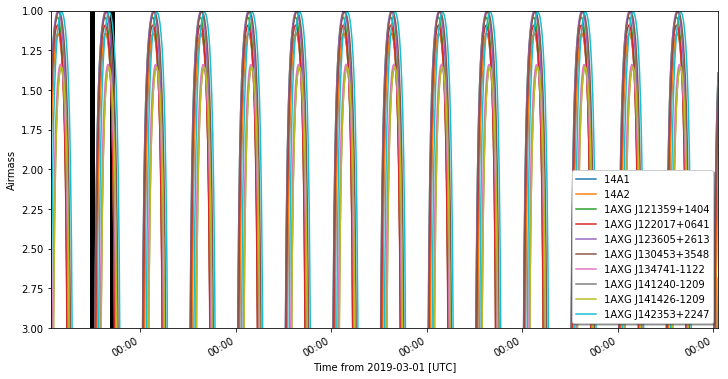

In [21]:
# Plotting the airmass of each of the 10 quasars versus time (through the entire observing window).
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
fig.tight_layout()

obs_time_grid = time_grid_from_range(obs_range)

for my_object in quasar_targets:
    ax = plot_airmass(my_object, ctio, obs_time_grid)

# Define the the first astronomical sunrise of the observing window
astr_rise_first = ctio.twilight_morning_astronomical(observe_start, which = 'nearest')
    
# The black lines on the plot indicate the time of an astronomical sunset and astronomical sunrise (left to right),
#so that the time between the lines is a time that the sky can be observed safely from the Sun. 
ax.vlines((astr_set + 24.0 * u.h).datetime, 1, 3, color = 'black', linestyles = 'solid', linewidth = 5)
ax.vlines((astr_rise_first + 24.0 * u.h).datetime, 1, 3, color = 'black', linewidth = 5)
    
ax.legend(loc = 0, shadow = True);

print("Based on the airmass plot below, most of the 10 quasar targets are observable (with regards to airmass)" +
      "for most of the night each night at the observatory, since the airmass for each target falls below ~2 for" +
      " most of the time interval shown.")
